# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [16]:
# Libraries
import pandas as pd

In [17]:
df_absences = pd.read_csv(r'E:\IronHack\IronHack_Classes\Week 4\Labs_Week_4\lab-linear-regression-correlation\data\absences.csv')
df_absences = df_absences.drop(columns='Unnamed: 0')
df_absences

,EmployeeID,Age,Absences
0,1,27,15
1,2,61,6
2,3,37,10
3,4,23,18
4,5,46,9
5,6,58,7
6,7,29,14
7,8,36,11
8,9,64,5
9,10,40,8


#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

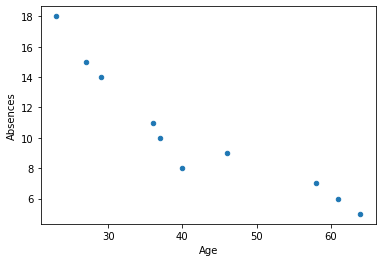

In [18]:
df_absences.plot('Age', 'Absences', kind='scatter')

In [19]:
#There is a strict negative correlation illustrating that, 
# indeed, the older you get, the less the employees are inclined to be absent

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [20]:
#Calculating Means of X & Y

x_mean_age = sum(df_absences['Age'])/len(df_absences['Age'])
print(x_mean_age)

y_mean_absence = sum(df_absences['Absences'])/len(df_absences['Absences'])
print(y_mean_absence)

42.1
10.3


In [50]:
def slope(x,y):
    x_mean_age = sum(x)/len(x)
    y_mean_absence = sum(y)/len(y)    
    m=sum([(x[i]-x_mean_age)*(y[i]-y_mean_absence) for i in range(len(x))])/sum([(x[i]-x_mean_age)**2 for i in range(len(x))])
    
    #b is calculated by y -m*x
    b=y_mean_absence-(m*x_mean_age)
    
    return m,b

def slope_line(x,m, b):
    y= m*x + b
    return y

In [53]:
m,b = slope(df_absences['Age'],df_absences['Absences'])
m,b

(-0.2681088337033404, 21.58738189891063)

In [42]:
m_b = slope(df_absences['Age'],df_absences['Absences'])
m_b

-0.2681088337033404 21.58738189891063


(-0.2681088337033404, 21.58738189891063)

#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

In [54]:
slope_line(df_absences['Age'][1], m,b)

5.232743043006867

In [58]:
df_absences["regression_y"] = df_absences['Age'].apply(lambda x: slope_line(x, m,b))

In [59]:
df_absences

,EmployeeID,Age,Absences,regression_y
0,1,27,15,14.348443
1,2,61,6,5.232743
2,3,37,10,11.667355
3,4,23,18,15.420879
4,5,46,9,9.254376
5,6,58,7,6.037070
6,7,29,14,13.812226
7,8,36,11,11.935464
8,9,64,5,4.428417
9,10,40,8,10.863029


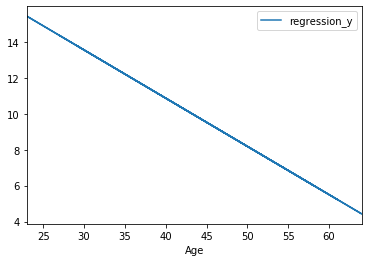

In [61]:
df_absences.plot(x='Age',y='regression_y')

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [64]:
def covar_calcul(x,y):
    x_mean_g = sum(x)/len(x)
    y_mean_g = sum(y)/len(y)  
    covar_x_y=0
    for i in range(len(x)):
        covar_x_y += (1/len(x))*(x-x_mean_g)*(y-y_mean_g)
    print('the covariance of X & Y is of', covar_x_y)
    return covar_x_y

In [72]:
covar_age_abs = covar_calcul(df_absences['Age'], df_absences['Absences'])

the covariance of X & Y is of 0    -70.97
1    -81.27
2      1.53
3   -147.07
4     -5.07
5    -52.47
6    -48.47
7     -4.27
8   -116.07
9      4.83
dtype: float64


#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [73]:
def correlation(x,y, covar_x_y):
    x_mean_g = sum(x)/len(x)
    y_mean_g = sum(y)/len(y)  
    stad_x = 0
    stad_x += ((sum(x -x_mean_g)**2))/(len(x))**(1/2)
    
    y_mean_g = sum(y)/len(y)
    stad_y = 0
    stad_y += ((sum(x -y_mean_g)**2))/(len(y))**(1/2)
    corr = covar_x_y/(stad_x * stad_y)
    print('correlation between X & Y is of', corr)
    return corr

In [74]:
correlation(df_absences['Age'], df_absences['Absences'], covar_age_abs)

correlation between X & Y is of 0   -3.475203e+25
1   -3.979565e+25
2    7.491983e+23
3   -7.201608e+25
4   -2.482638e+24
5   -2.569310e+25
6   -2.373441e+25
7   -2.090900e+24
8   -5.683624e+25
9    2.365116e+24
dtype: float64


0   -3.475203e+25
1   -3.979565e+25
2    7.491983e+23
3   -7.201608e+25
4   -2.482638e+24
5   -2.569310e+25
6   -2.373441e+25
7   -2.090900e+24
8   -5.683624e+25
9    2.365116e+24
dtype: float64

In [ ]:
# your code here

In [ ]:
# your comments here

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [ ]:
# your comments here

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [24]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [ ]:
# covariance formula = {Cov}(X,Y)=\sum _{{i=1}}^{n}\sum _{{j=1}}^{m}\,x_{i}y_{j}\operatorname {P}(X=x_{i}\ {\textrm  {et}}\ Y=y_{j})-\operatorname {E}[X]\operatorname {E}[Y]

# correlation formula (1/(n-1))(sum(x-mean(x)*(y-mean(y))))/(stdx & std y)

In [25]:
#Calculating mean of X & Y
x_mean = sum(ironbeers_df['X'])/len(ironbeers_df['X'])

y_mean = sum(ironbeers_df['Y'])/len(ironbeers_df['Y'])


In [26]:
# covariance X & Y
covariance_x_y = 0

for i in range(len(ironbeers_df['X'])):
    covariance_x_y += (1/(len(ironbeers_df['X'])))*((ironbeers_df['X'][i]-x_mean))*((ironbeers_df['Y'][i]-y_mean))
print('the covariance of X & Y is of', covariance_x_y)

the covariance of X & Y is of 10.5


In [27]:
#Standard deviation of X
# x_mean
std_x = 0
std_x += ((sum([(i - x_mean)**2 for i in ironbeers_df['X']]))/(len(ironbeers_df['X'])))**(1/2)

print('the standard deviation of X is of', std_x)    

#Standard deviation of Y
# y_mean
std_y = 0
# for i in ironbeers_df['Y']:
std_y += ((sum([(i - y_mean)**2 for i in ironbeers_df['Y']]))/(len(ironbeers_df['Y'])))**(1/2)
print('the standard deviation of Y is of', std_y)    

the standard deviation of X is of 4.06201920231798
the standard deviation of Y is of 2.6457513110645907


In [28]:
#Correlation X/Y = Cov(X,Y)/stdX * stdY

corr_x_y = covariance_x_y /(std_x * std_y)

print('the correlation of X & Y is of', corr_x_y)

the correlation of X & Y is of 0.9770084209183942


#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

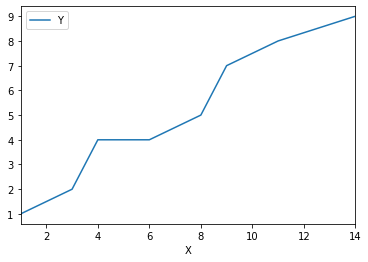

In [29]:
x_y_plot= ironbeers_df.plot('X', 'Y')

##### There seems to be a strong correlation between X & Y, since the plot is approximatively a straight line. The correlation is indeed confirmed by the correlation(X,Y) of 0.9770, which is extremly high, near to total correlation of 1

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [75]:
def reg_line(x,m,b):
    y= m*x + b
    return y

In [76]:
m_ironbeer,b_ironbeer = slope(ironbeers_df['X'], ironbeers_df['Y'])

In [77]:
m_ironbeer,b_ironbeer

(0.6363636363636364, 0.5454545454545459)

In [79]:
ironbeers_df['Y_regression_points'] = ironbeers_df['X'].apply(lambda x: reg_line(x, m_ironbeer,b_ironbeer))

In [80]:
ironbeers_df

,X,Y,Y_regression_points
0,1,1,1.181818
1,3,2,2.454545
2,4,4,3.090909
3,6,4,4.363636
4,8,5,5.636364
5,9,7,6.272727
6,11,8,7.545455
7,14,9,9.454545


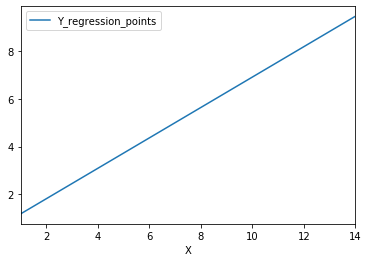

In [81]:
ironbeers_df.plot(x='X', y = 'Y_regression_points')

In [ ]:
# Clear correlatioj from 0 onwards between X & Y

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [ ]:
# Given the clear regression line, where you have an almost straight correlation between X & Y
# it does seem I am the ONE person who makes Ironhackers flee the IronBeer when I am there
# I am a nice person though, I don't know why, how sad !

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [ ]:
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [ ]:
regressor = LinearRegression()


In [ ]:
ironbeers_df['expected_Y'] = LinearRegression(ironbeers_df['X'], ironbeers_df['Y'])

In [ ]:
ironbeers_df

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [ ]:
ironbeers_df['error'] = regressor.fit(, ironbeers_df['X'])

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [ ]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [ ]:
# your code here

In [ ]:
# your comments here